In [1]:
# ! pip install arviz
! pip install pymc
! pip install seaborn
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pymc as pm
import seaborn as sns

from matplotlib.lines import Line2D
from scipy import stats

# we can install scikit-optimize using the following line, then import it
! pip install scikit-optimize
from skopt import gp_minimize
# from skopt import gp_maximize

In [2]:
# **********************************
# First Run This Cell to 
# import the necessary libraries
# **********************************
#
# Please run this cell before running anything, and run this cell again if you have restarted the 
# python kernel.
#
# This cell imports useful routines to diagnose the simulations here
#

%matplotlib notebook
import osiris
from osiris import tajima
from tajima_helper import plot_maxgamma_t, newifile, newifile2, laser_envelope, tajima_widget2, tajima_moving_widget, xt_and_energy_plot,xt_and_energy_plot2,k_plot2
from tajima_helper import ml_deckmaker
import numpy as np
import matplotlib.pyplot as plt
from osh5vis import osplot
from osh5io import read_h5
from osh5utils import fft
import osh5utils
import osh5io
import osh5def


from ipywidgets import interact_manual,Layout,interact, FloatSlider
import ipywidgets as widgets

interact_calc=interact_manual.options(manual_name="Make New Input and Run")

%load_ext autoreload
%autoreload 2

In [40]:
# print(ml_deckmaker(lon_flat=18,energy=10))
def f(lon_flat):
    return(-1*ml_deckmaker(lon_flat=lon_flat,energy=2.0))

In [41]:
res_linear = gp_minimize(f,                  # the function to minimize
                  [(2.5, 23.0)],      # the bounds on each dimension of x
                  acq_func="gp_hedge",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=2,  # the number of random initialization points
                  random_state=4321)   # the random seed


runosiris completed normally
done


In [23]:
"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

'x^*=3.7988, f(x^*)=-1.6803'

In [42]:
"x^*=%.4f, f(x^*)=%.4f" % (res_linear.x[0], res_linear.fun)

'x^*=5.5042, f(x^*)=-28986.8280'

In [24]:
res

          fun: -1.680294592767179
    func_vals: array([-1.47414867, -0.90292894, -1.48363747, -1.51720873, -1.63415926,
       -1.64548391, -0.        , -1.05652804, -1.63419768, -0.96583207,
       -1.62107507, -1.63565392, -1.63912428, -0.81684289, -1.6728916 ,
       -1.64731268, -1.6577229 , -1.63630575, -1.68029459, -1.64918506,
       -1.6302165 , -1.62390245, -1.65645504, -1.66908182, -1.67787578,
       -1.67123133, -1.67413504, -1.65365964, -1.6615064 , -0.        ,
       -1.0976515 , -1.13297531, -1.58275346, -0.88103083, -0.86340346,
       -0.84191594, -0.84915924, -0.        , -1.08685477, -1.5850133 ,
       -1.62489613, -1.61904845, -1.61796518, -1.59135649, -1.6079046 ,
       -1.58014316, -1.65950677, -1.65679585, -1.61082816, -1.65627483,
       -1.65407136, -1.3467692 , -1.65455544, -1.66522376, -1.66021284,
       -1.66029106, -1.65830646, -1.66128051, -1.14694902, -1.65757484,
       -1.66173666, -1.27813587, -1.62701875, -1.66100922, -0.81393057,
       -1.66381

125


<IPython.core.display.Javascript object>


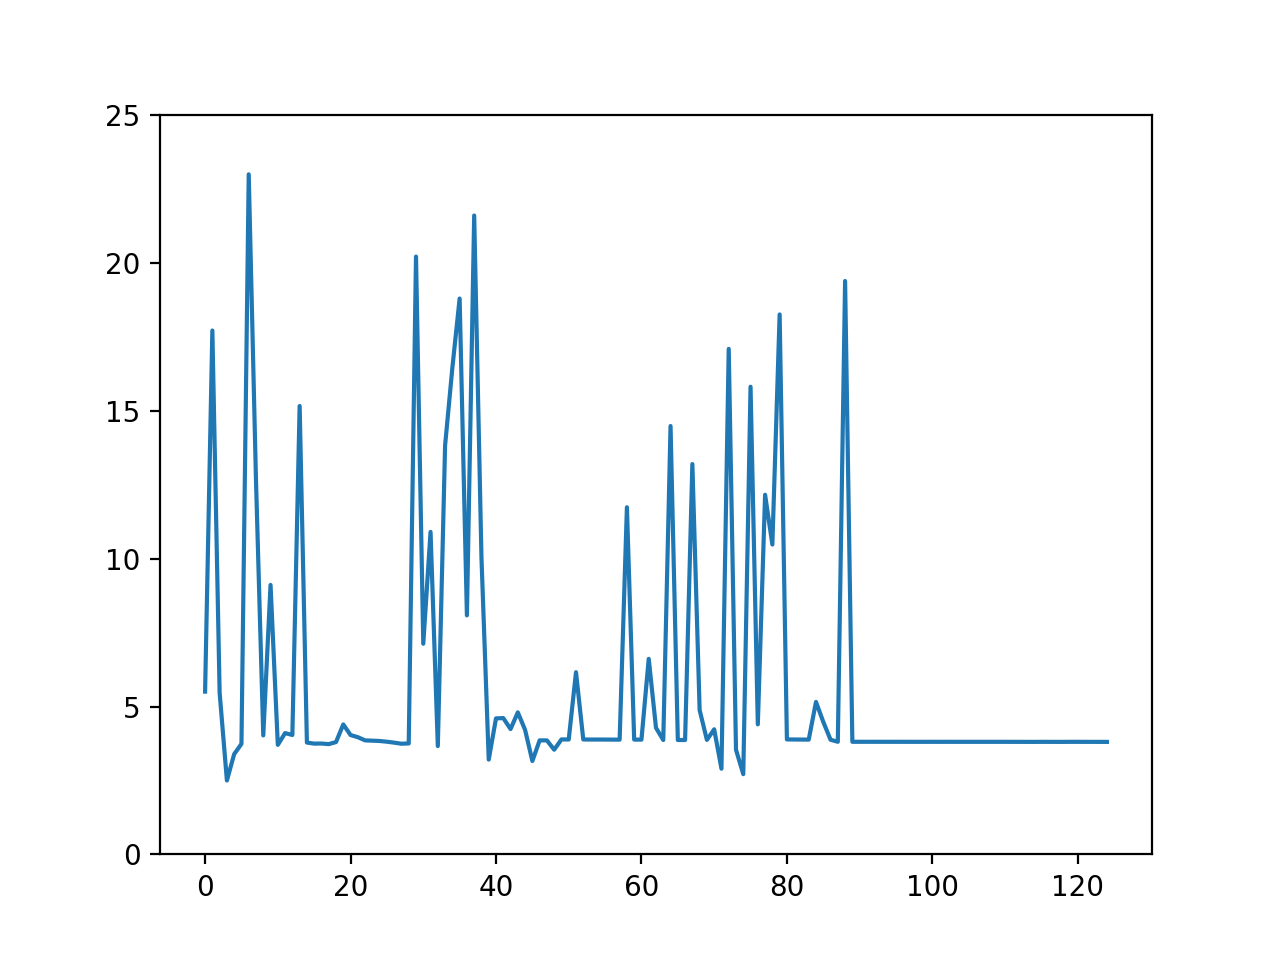

<IPython.core.display.Javascript object>


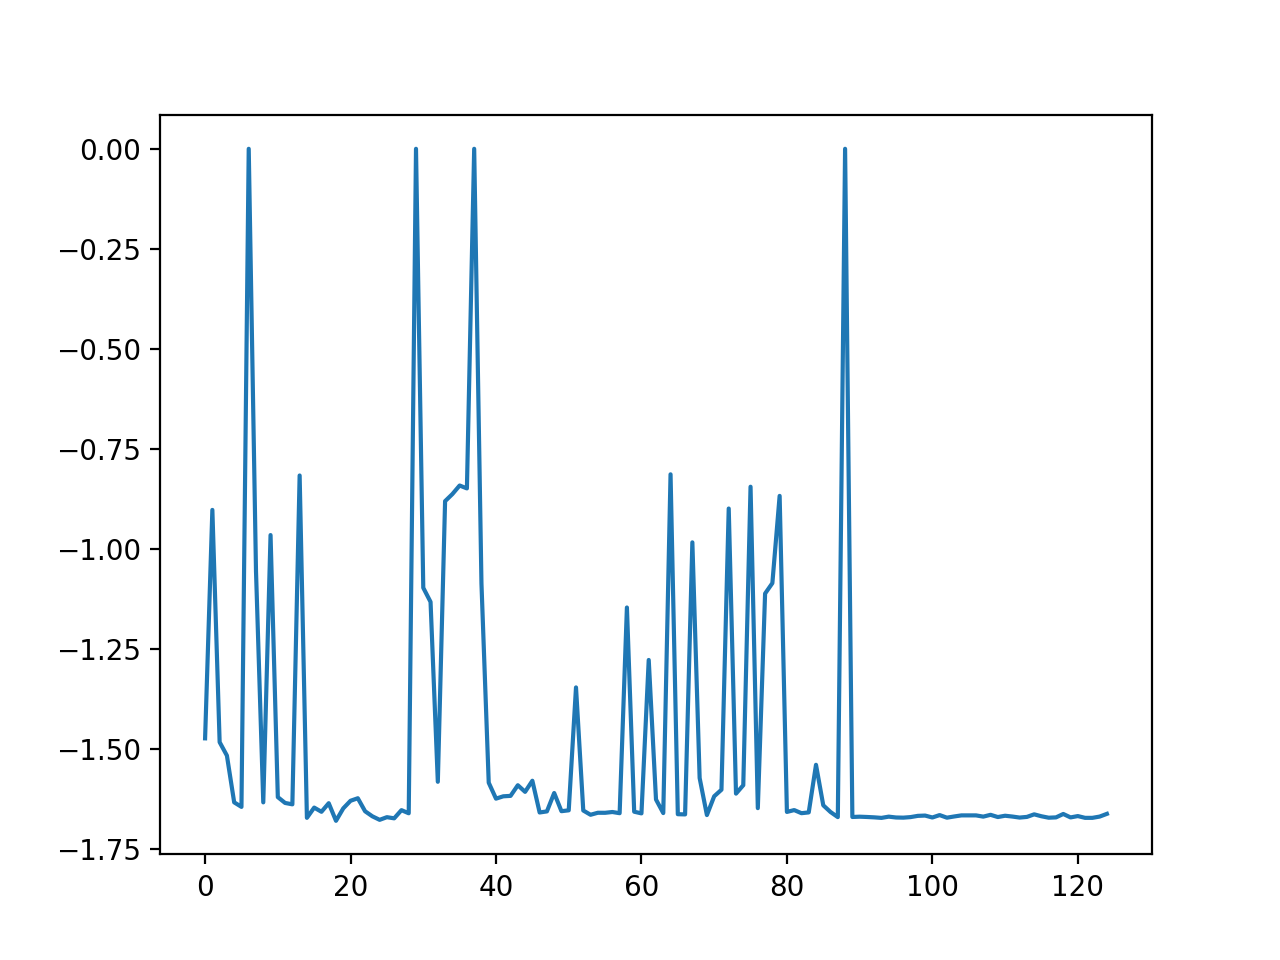

In [45]:
import matplotlib.pyplot as plt
print (len(res.x_iters))
trials=np.zeros(len(res.x_iters))
i=0
for lists in res.x_iters:
    trials[i]=lists[0]
    i=i+1

plt.figure()
plt.plot(trials)
plt.ylim((0,25))
plt.show()

plt.figure()
plt.plot(res.func_vals)

<IPython.core.display.Javascript object>


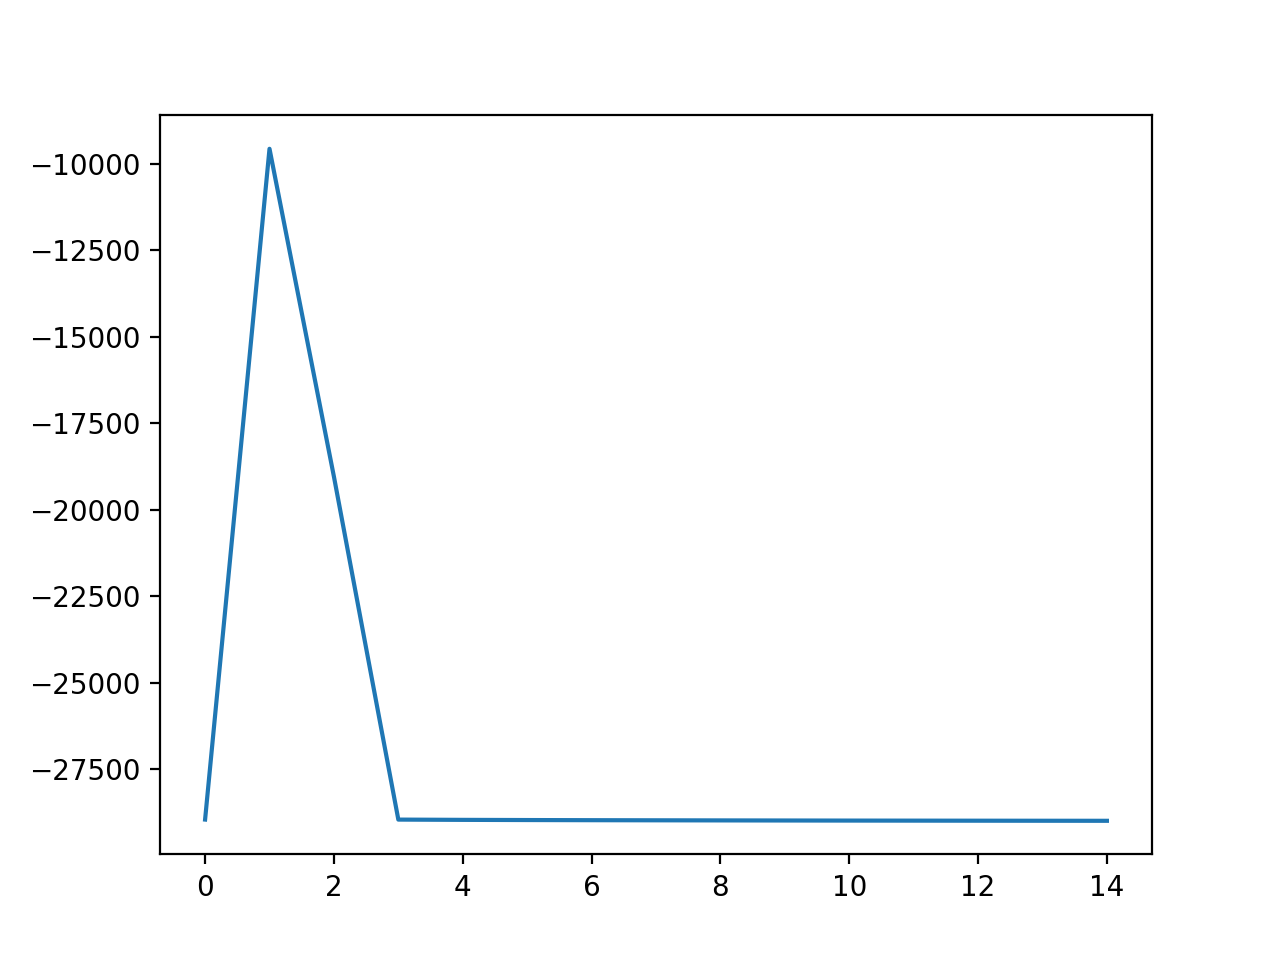

In [44]:
plt.figure()
plt.plot(res_linear.func_vals)